<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/TEXT_CLASSIFICATION_USING_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Loading the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Defining the categories
categories = ['alt.atheism',  'comp.graphics',  'comp.os.ms-windows.misc',  'comp.sys.ibm.pc.hardware',  'comp.windows.x',  'misc.forsale',
 'rec.autos',  'rec.motorcycles',  'rec.sport.baseball',  'rec.sport.hockey',  'sci.crypt',  'sci.electronics', 'sci.med',  'sci.med',
 'sci.space',  'soc.religion.christian',  'talk.politics.guns',  'talk.politics.mideast',  'talk.politics.misc',  'talk.religion.misc']

#training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)

#testing on the data for these categories
test = fetch_20newsgroups(subset='test', categories=categories)

In [11]:
#printing  training data
#print(test.data[20])
print(train.data[20])
#print(len(train.data))

From: jfreund@taquito.engr.ucdavis.edu (Jason Freund)
Subject: Info on Medical Imaging systems
Organization: College of Engineering - University of California - Davis
Lines: 10


	Hi, 

	Is anyone into medical imaging?  I have a good ray tracing background,
and I'm interested in that field.  Could you point me to some sources?  Or
better yet, if you have any experience, do you want to talk about what's
going on or what you're working on?

Thanks,
Jason Freund



In [13]:
#importing necesary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#crwating the model based on  Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
#training the model with the train data
model.fit(train.data, train.target)
#creating labels for the test data
labels = model.predict(test.data)


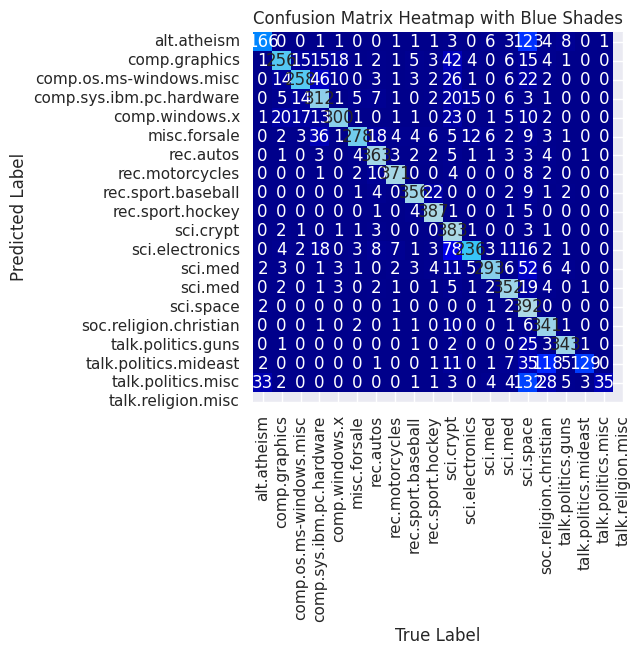

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Assuming 'test.target' contains true labels and 'labels' contains predicted labels
true_labels = test.target  # True labels from your test set
predicted_labels = labels   # Predicted labels from your model

# Create confusion matrix
mat = confusion_matrix(true_labels, predicted_labels)

# Define shades of blue for the colormap
blue_colors = ["darkblue", "blue", "deepskyblue", "skyblue", "lightblue"]
cmap_blue = LinearSegmentedColormap.from_list("custom_blues", blue_colors)

# Create heatmap
sns.heatmap(
    mat,
    square=True,
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=train.target_names,
    yticklabels=train.target_names,
    cmap=cmap_blue  # Apply custom blue colormap here
)

# Creating the plots
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap with Blue Shades')
plt.show()

In [28]:
#predicting category on new data based on trained data
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [30]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [31]:
predict_category('Sending load to International Space Station')


'sci.space'

In [32]:
predict_category('BMW is better than Audi')

'rec.autos'

In [33]:
predict_category('President Of India')

'talk.politics.misc'

In [34]:
predict_category('Suzuki Hayabusa is a very fast motorcycle ')

'rec.motorcycles'